In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:

df = pd.read_csv('datasets/Datos_logisticos.csv')
#df.head(10)

variablex = df[['Productos-Lote', 'Tiempo-Entrega']].values.reshape((-1,2))
variabley = df[['Defectuoso']].values.reshape((-1,1))

model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(variablex, variabley, test_size=0.2, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

/nix/store/qjgmb81jx90lj7c6xxrkq8i5h8rgjn7g-python3.12-scikit-learn-1.6.1/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [59]:

# Calculo de la precision manual
mse = 0
for i in range(len(y_pred)):
    mse += (y_pred[i] - y_test[i])**2
mse = mse/len(y_pred)
print(f'mse: {mse}')

mae = 0
for i in range(len(y_pred)):
    mae += abs(y_pred[i] - y_test[i])
mae = mae/len(y_pred)
print(f'mae: {mae}')

r2 = 1 - (mse/np.var(y_test))
print(f'r2: {r2}')

score = model.score(x_test, y_test)
print(f'Precision: {score*100}%')


mse: [0.1125]
mae: [0.1125]
r2: [0.50549451]
Precision: 88.75%


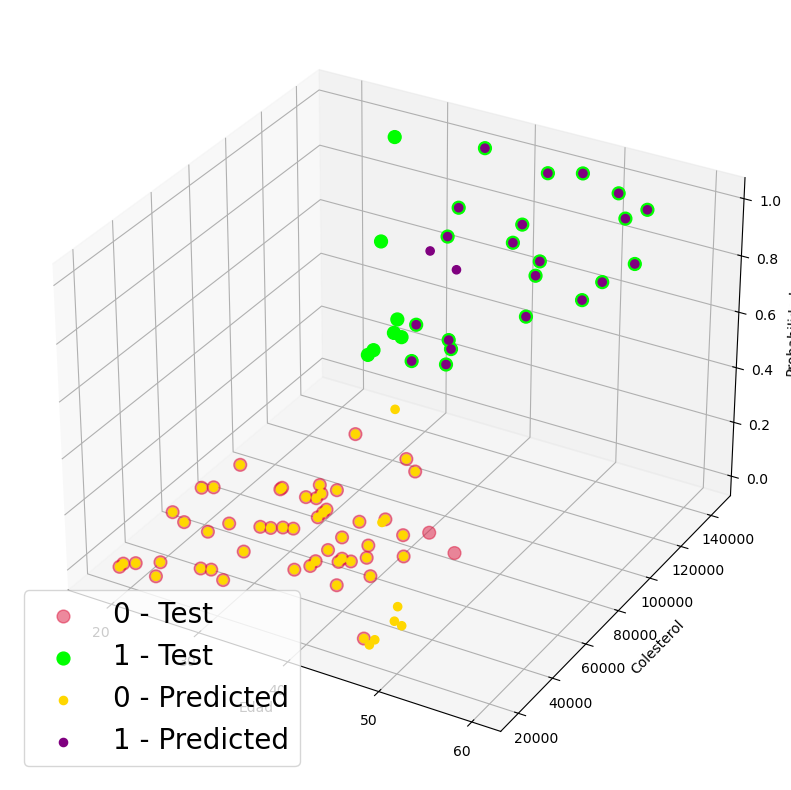

In [21]:
#########################
# Plot obtained results #
#########################
fig = plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
ax = fig.add_subplot(111, projection='3d')
# Print class 0 of y test  #
ax.scatter(x_test[np.where(y_test == 0)[0],0], x_test[np.where(y_test == 0)[0],1], 0, s=85, c='crimson', alpha=0.5, label = "0 - Test")
# Print class 1 of y test #
ax.scatter(x_test[np.where(y_test == 1)[0],0], x_test[np.where(y_test == 1)[0],1], 1, s=85, c='lime', alpha=1, label = "1 - Test")
# Print class 0 of y predicted  #
ax.scatter(x_test[np.where(y_pred == 0)[0],0], x_test[np.where(y_pred == 0)[0],1], 0, s=35, c='gold', alpha=1, label = "0 - Predicted")
# Print class 1 of y predictet #
ax.scatter(x_test[np.where(y_pred == 1)[0],0], x_test[np.where(y_pred == 1)[0],1], 1, s=35, c='purple', alpha=1, label = "1 - Predicted")
ax.set_xlabel("Edad")
ax.set_ylabel("Colesterol")
ax.set_zlabel("Probabilidad")
plt.legend(fontsize=20, loc="lower left")